# [作業目標]
- 使用 Day 12 剛學到的方法, 對較完整的資料生成離散化特徵
- 觀察上述離散化特徵, 對於目標值的預測有沒有幫助

# [作業重點]
- 仿照 Day 12 的語法, 將年齡資料 ('DAYS_BIRTH' 除以 365) 離散化
- 繪製上述的 "離散化標籤" 與目標值 ('TARGET') 的長條圖

In [1]:
# 載入需要的套件
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import matplotlib.gridspec as gridspec

%matplotlib inline

# 設定 data_path
dir_data = 'C:\\Users\\Meng-Huan\\Documents\\GitHub\\2nd-ML100Days\\data'

### 之前做過的處理

In [2]:
# 讀取資料檔
f_app_train = os.path.join(dir_data, 'application_train.csv')
app_train = pd.read_csv(f_app_train)
app_train.shape

(307511, 122)

In [3]:
# 將只有兩種值的類別型欄位, 做 Label Encoder, 計算相關係數時讓這些欄位可以被包含在內
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# 檢查每一個 column
for col in app_train:
    if app_train[col].dtype == 'object':
        # 如果只有兩種值的類別型欄位
        if len(list(app_train[col].unique())) <= 2:
            # 就做 Label Encoder, 以加入相關係數檢查
            app_train[col] = le.fit_transform(app_train[col])            
print(app_train.shape)
app_train.head()

(307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,0,M,0,1,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,0,F,0,0,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,1,M,1,1,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,0,F,0,1,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,0,M,0,1,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
# 受雇日數為異常值的資料, 另外設一個欄位記錄, 並將異常的日數轉成空值 (np.nan)
app_train['DAYS_EMPLOYED_ANOM'] = app_train["DAYS_EMPLOYED"] == 365243
app_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

# 出生日數 (DAYS_BIRTH) 取絕對值 
app_train['DAYS_BIRTH'] = abs(app_train['DAYS_BIRTH'])

## 練習時間
參考 Day 12 範例程式，離散化你覺得有興趣的欄位，並嘗試找出有趣的訊息

In [5]:
selected_dtype = 'int32' or 'int64' or 'float64'
print(app_train['DAYS_BIRTH'].dtype == selected_dtype)
app_train.dtypes.value_counts()

False


float64    66
int64      40
object     13
int32       3
bool        1
dtype: int64

SK_ID_CURR


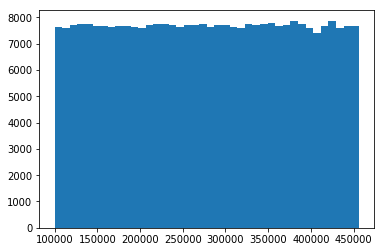

TARGET


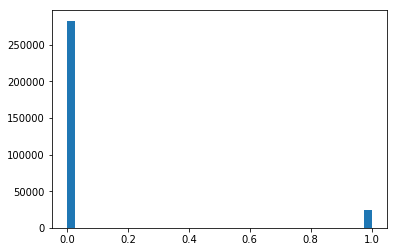

NAME_CONTRACT_TYPE


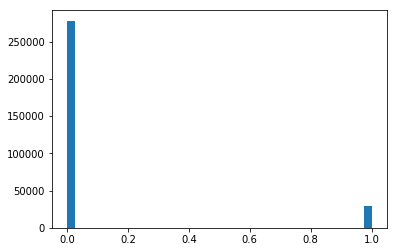

FLAG_OWN_CAR


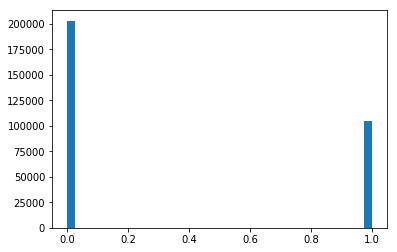

FLAG_OWN_REALTY


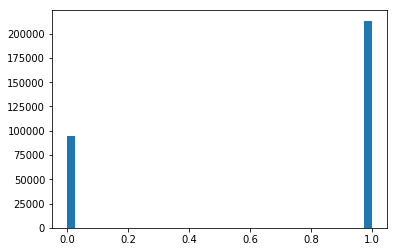

CNT_CHILDREN


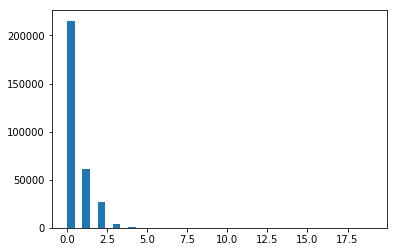

AMT_INCOME_TOTAL


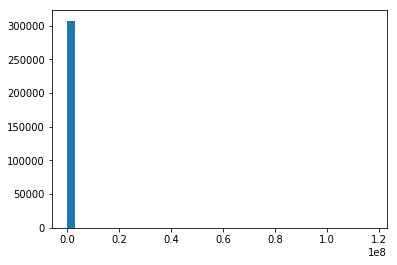

AMT_CREDIT


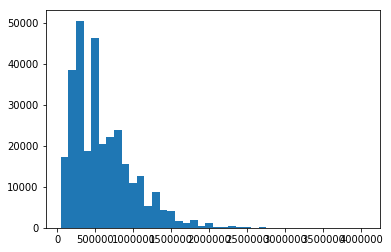

AMT_ANNUITY


C:\Users\Meng-Huan\Anaconda3\envs\tensorflow-env\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\Meng-Huan\Anaconda3\envs\tensorflow-env\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


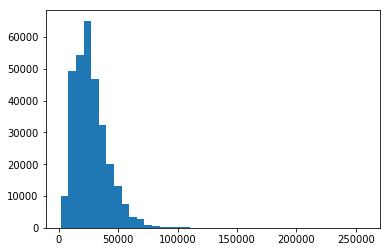

AMT_GOODS_PRICE


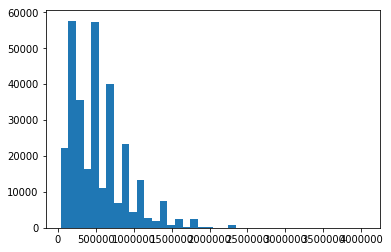

REGION_POPULATION_RELATIVE


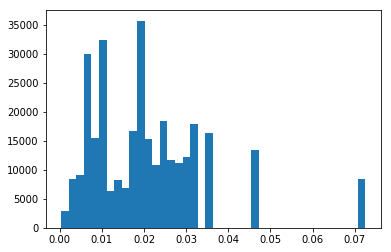

DAYS_BIRTH


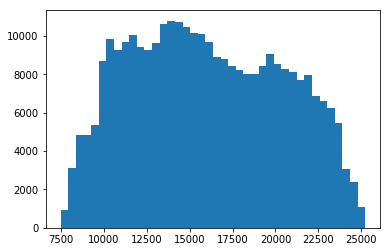

DAYS_EMPLOYED


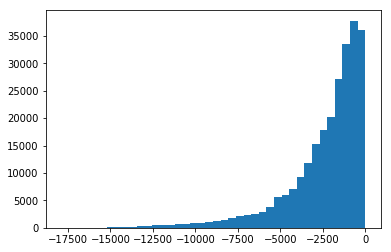

DAYS_REGISTRATION


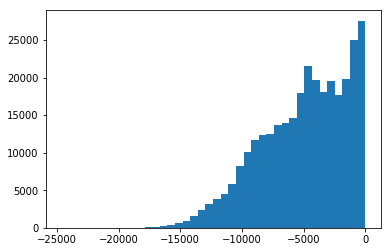

DAYS_ID_PUBLISH


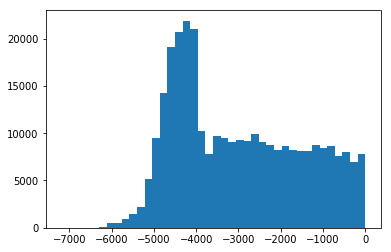

OWN_CAR_AGE


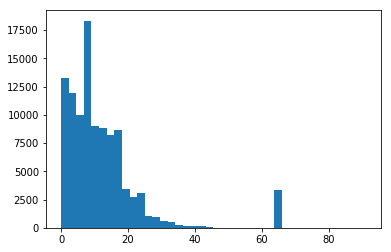

FLAG_MOBIL


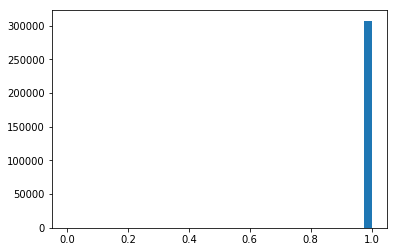

FLAG_EMP_PHONE


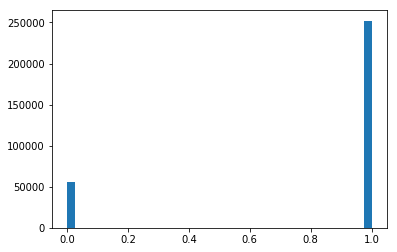

FLAG_WORK_PHONE


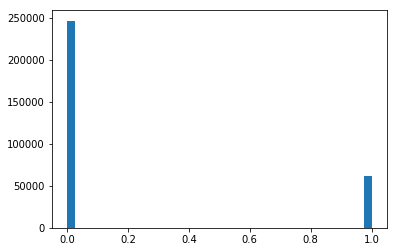

FLAG_CONT_MOBILE


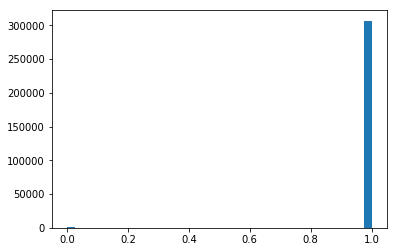

FLAG_PHONE


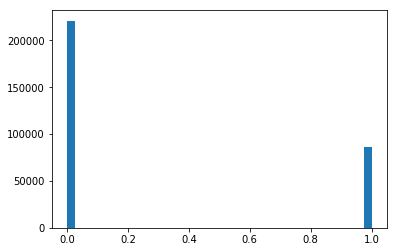

FLAG_EMAIL


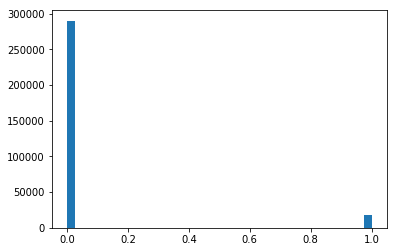

CNT_FAM_MEMBERS


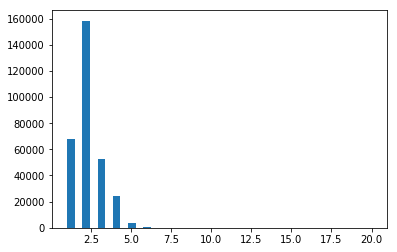

REGION_RATING_CLIENT


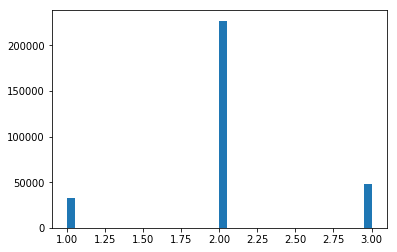

REGION_RATING_CLIENT_W_CITY


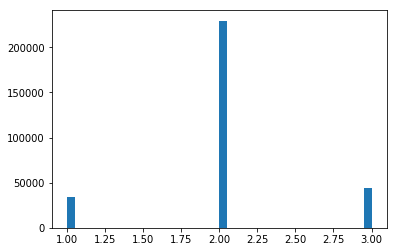

HOUR_APPR_PROCESS_START


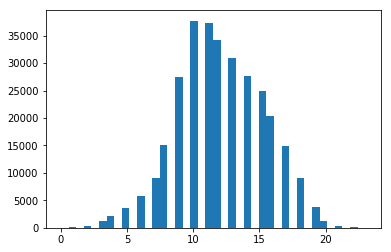

REG_REGION_NOT_LIVE_REGION


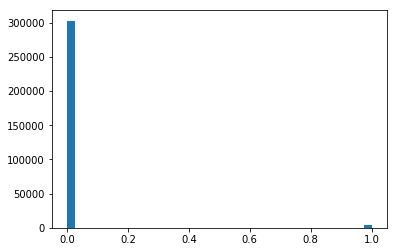

REG_REGION_NOT_WORK_REGION


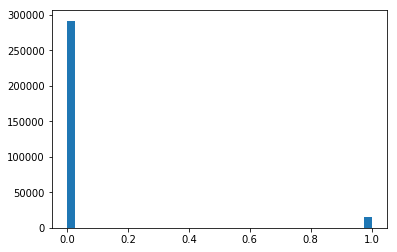

LIVE_REGION_NOT_WORK_REGION


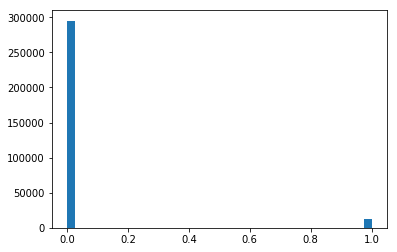

REG_CITY_NOT_LIVE_CITY


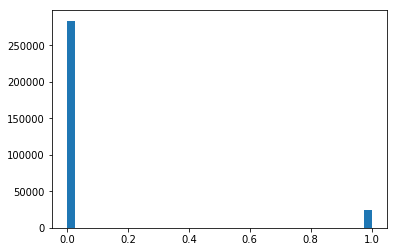

REG_CITY_NOT_WORK_CITY


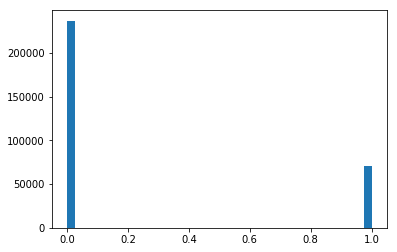

LIVE_CITY_NOT_WORK_CITY


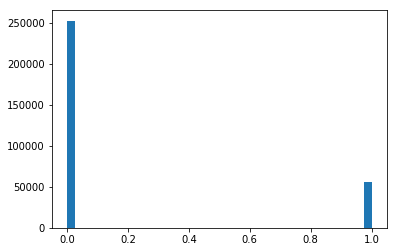

EXT_SOURCE_1


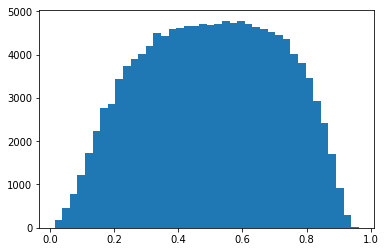

EXT_SOURCE_2


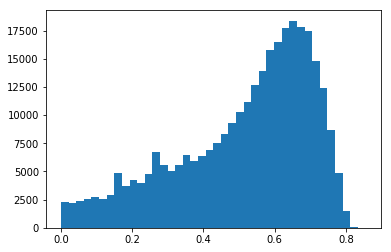

EXT_SOURCE_3


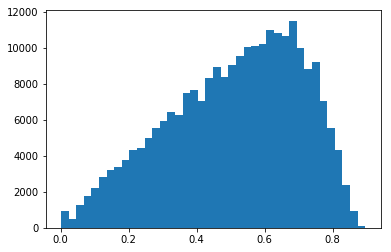

APARTMENTS_AVG


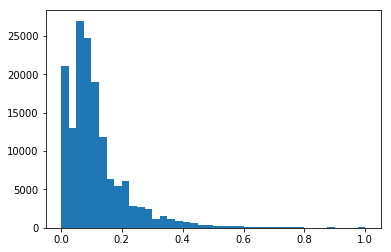

BASEMENTAREA_AVG


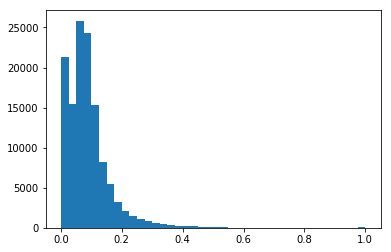

YEARS_BEGINEXPLUATATION_AVG


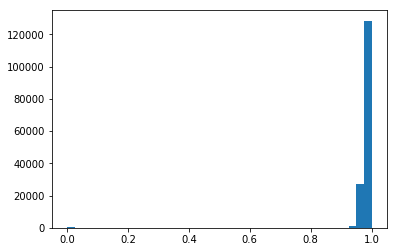

YEARS_BUILD_AVG


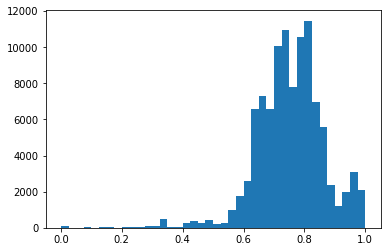

COMMONAREA_AVG


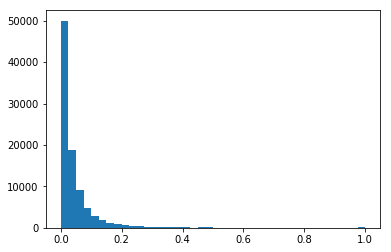

ELEVATORS_AVG


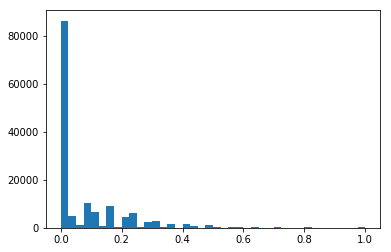

ENTRANCES_AVG


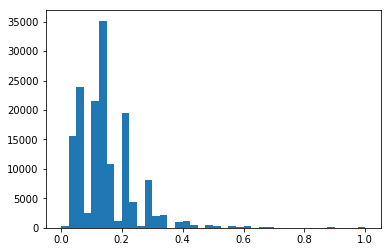

FLOORSMAX_AVG


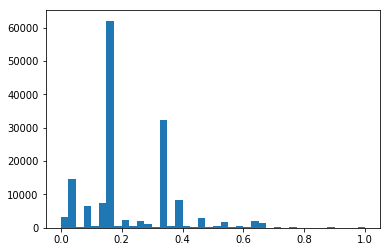

FLOORSMIN_AVG


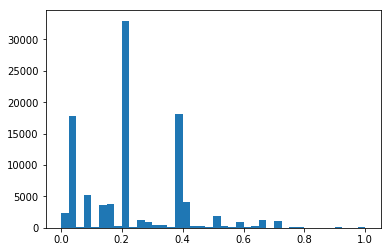

LANDAREA_AVG


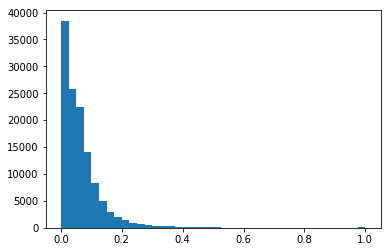

LIVINGAPARTMENTS_AVG


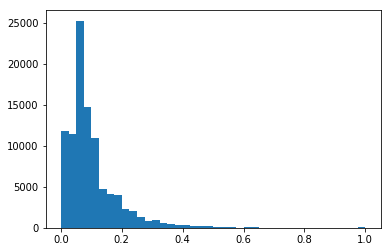

LIVINGAREA_AVG


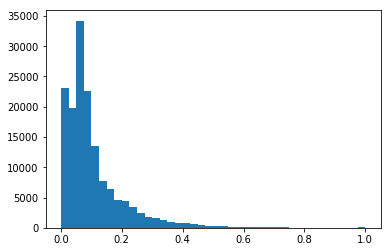

NONLIVINGAPARTMENTS_AVG


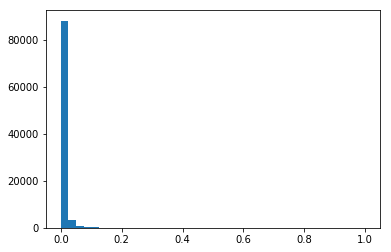

NONLIVINGAREA_AVG


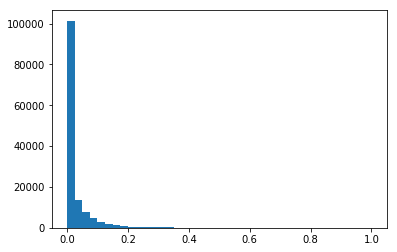

APARTMENTS_MODE


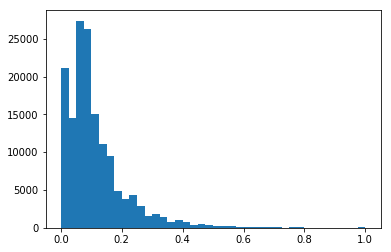

BASEMENTAREA_MODE


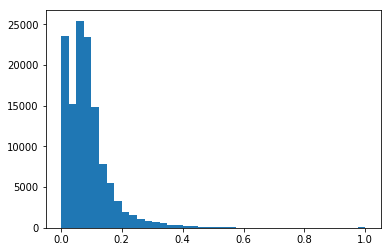

YEARS_BEGINEXPLUATATION_MODE


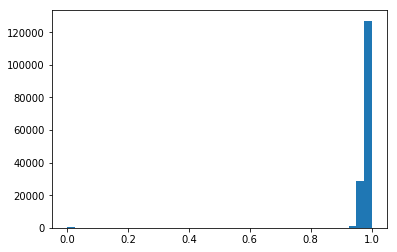

YEARS_BUILD_MODE


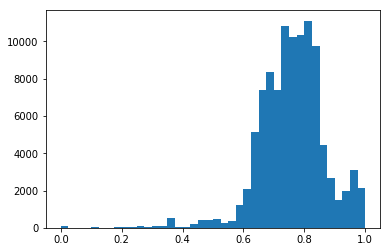

COMMONAREA_MODE


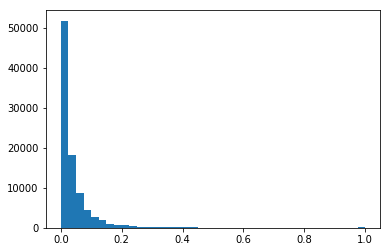

ELEVATORS_MODE


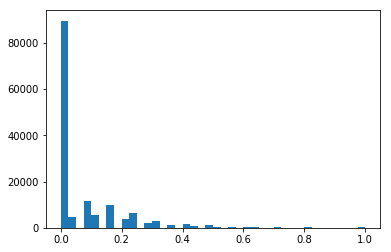

ENTRANCES_MODE


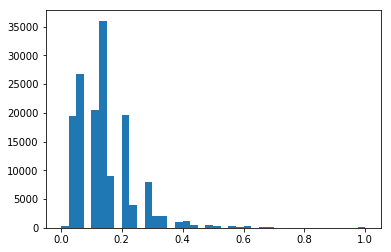

FLOORSMAX_MODE


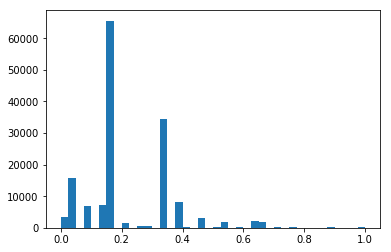

FLOORSMIN_MODE


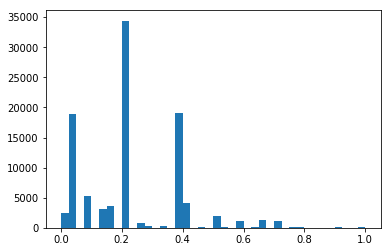

LANDAREA_MODE


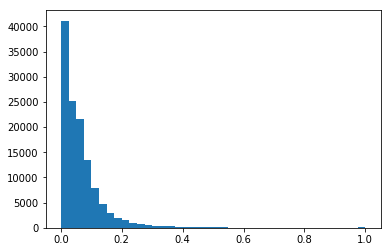

LIVINGAPARTMENTS_MODE


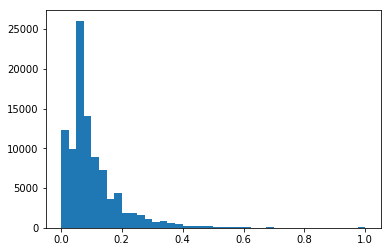

LIVINGAREA_MODE


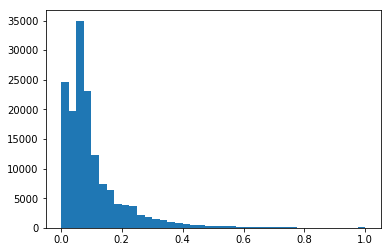

NONLIVINGAPARTMENTS_MODE


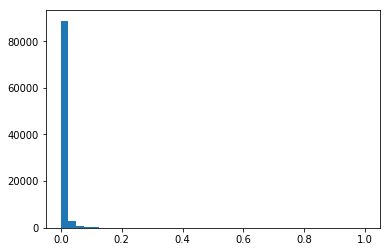

NONLIVINGAREA_MODE


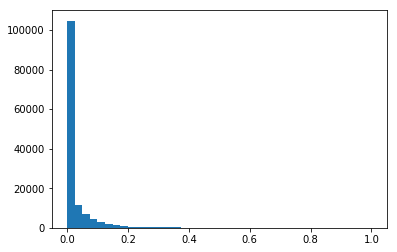

APARTMENTS_MEDI


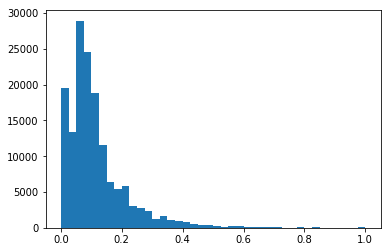

BASEMENTAREA_MEDI


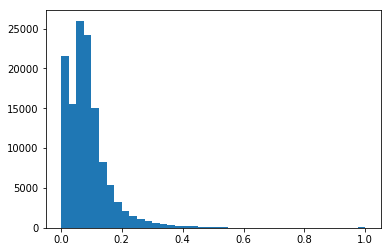

YEARS_BEGINEXPLUATATION_MEDI


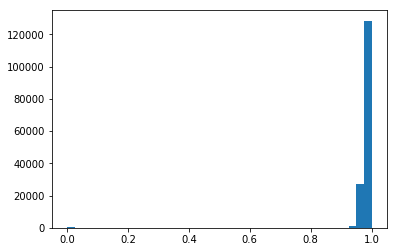

YEARS_BUILD_MEDI


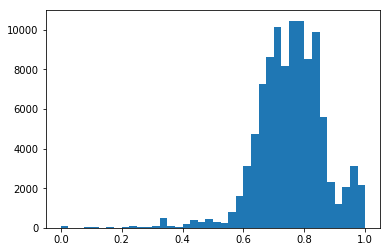

COMMONAREA_MEDI


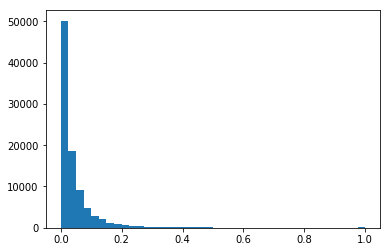

ELEVATORS_MEDI


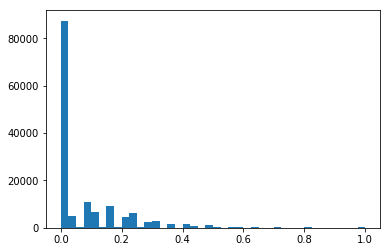

ENTRANCES_MEDI


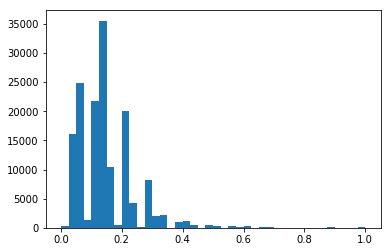

FLOORSMAX_MEDI


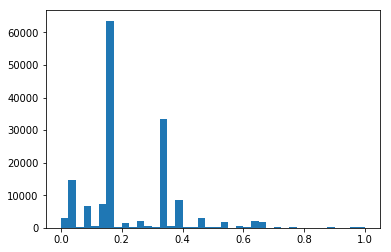

FLOORSMIN_MEDI


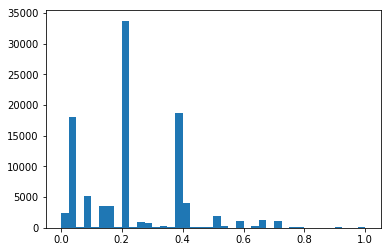

LANDAREA_MEDI


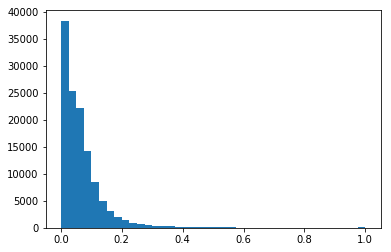

LIVINGAPARTMENTS_MEDI


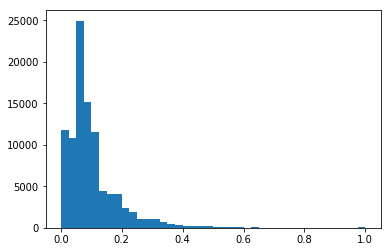

LIVINGAREA_MEDI


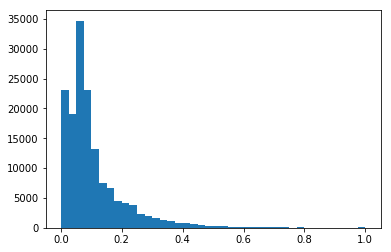

NONLIVINGAPARTMENTS_MEDI


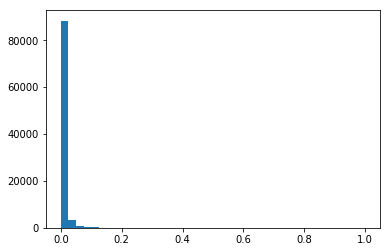

NONLIVINGAREA_MEDI


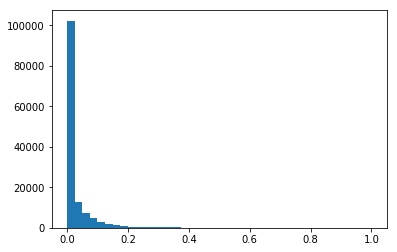

TOTALAREA_MODE


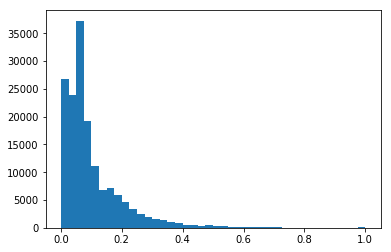

OBS_30_CNT_SOCIAL_CIRCLE


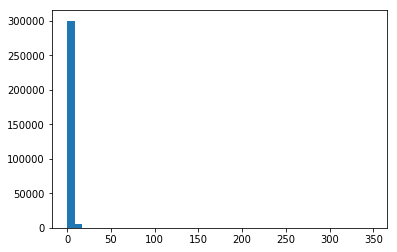

DEF_30_CNT_SOCIAL_CIRCLE


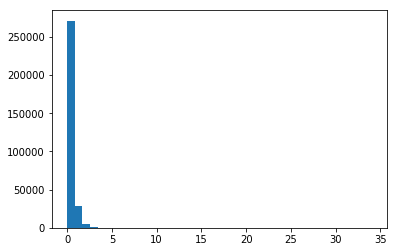

OBS_60_CNT_SOCIAL_CIRCLE


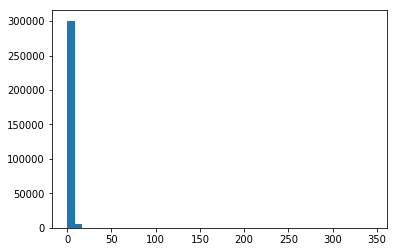

DEF_60_CNT_SOCIAL_CIRCLE


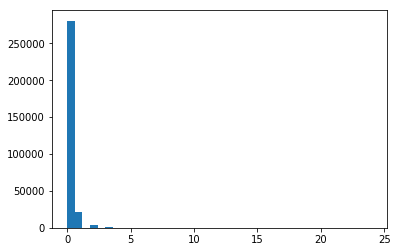

DAYS_LAST_PHONE_CHANGE


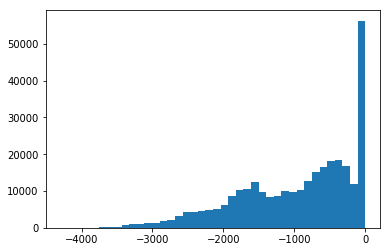

FLAG_DOCUMENT_2


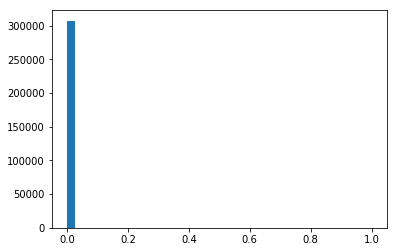

FLAG_DOCUMENT_3


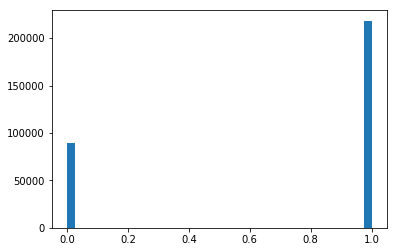

FLAG_DOCUMENT_4


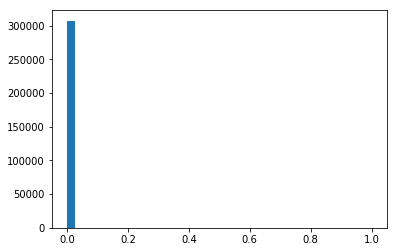

FLAG_DOCUMENT_5


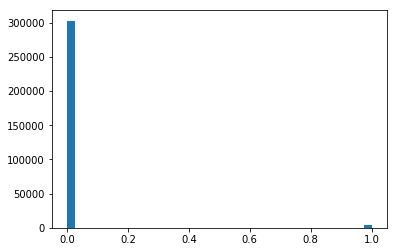

FLAG_DOCUMENT_6


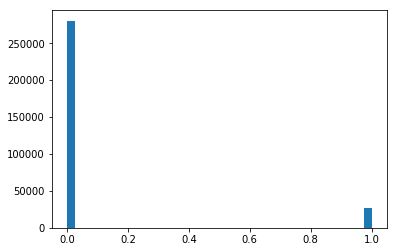

FLAG_DOCUMENT_7


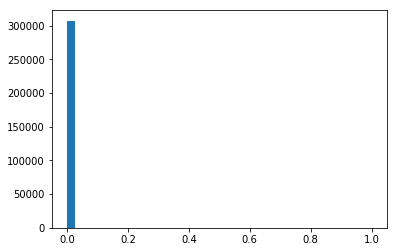

FLAG_DOCUMENT_8


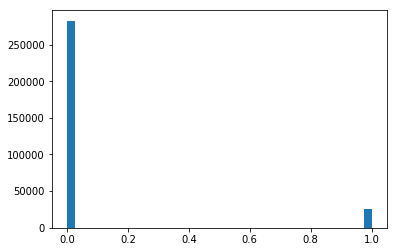

FLAG_DOCUMENT_9


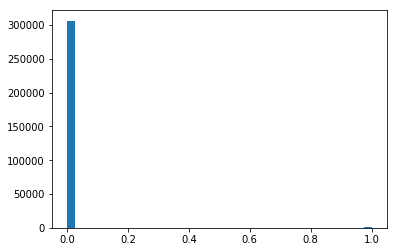

FLAG_DOCUMENT_10


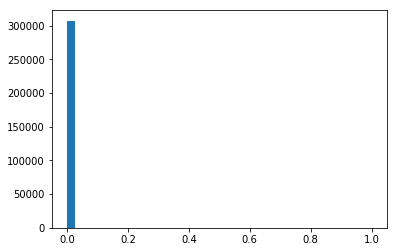

FLAG_DOCUMENT_11


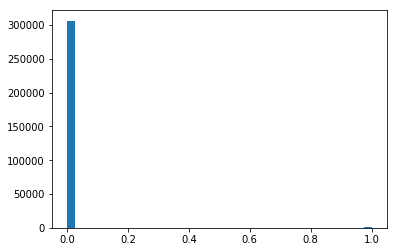

FLAG_DOCUMENT_12


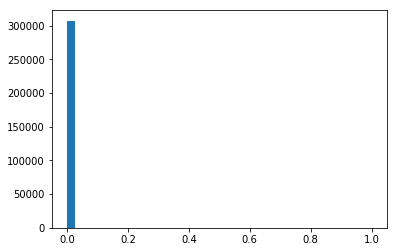

FLAG_DOCUMENT_13


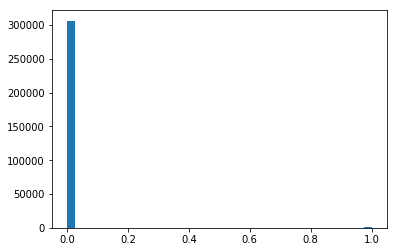

FLAG_DOCUMENT_14


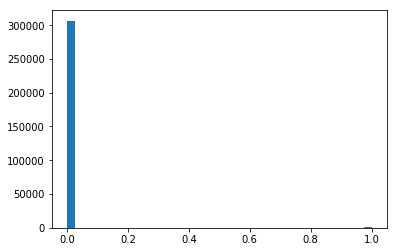

FLAG_DOCUMENT_15


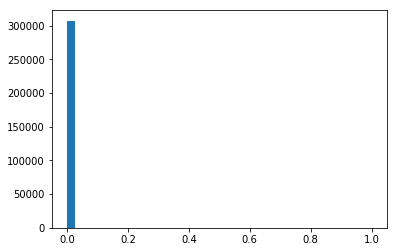

FLAG_DOCUMENT_16


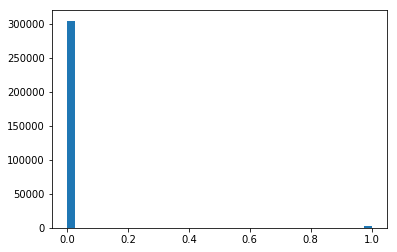

FLAG_DOCUMENT_17


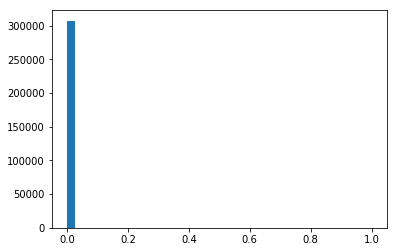

FLAG_DOCUMENT_18


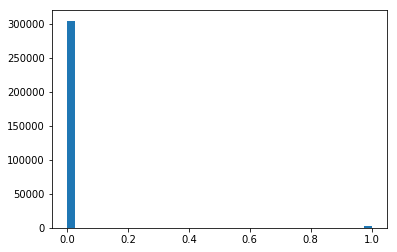

FLAG_DOCUMENT_19


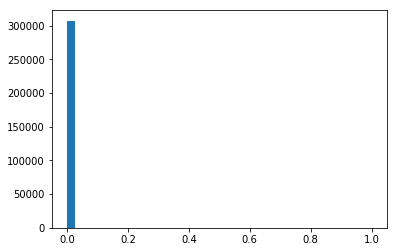

FLAG_DOCUMENT_20


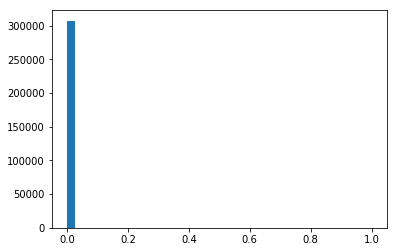

FLAG_DOCUMENT_21


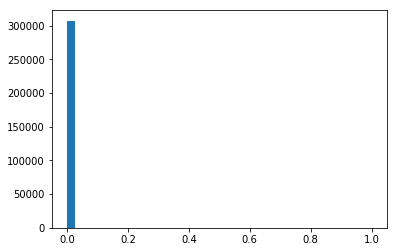

AMT_REQ_CREDIT_BUREAU_HOUR


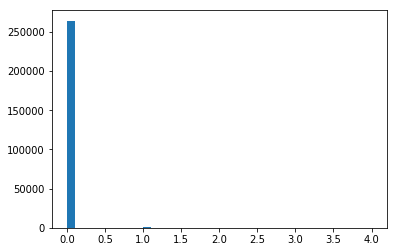

AMT_REQ_CREDIT_BUREAU_DAY


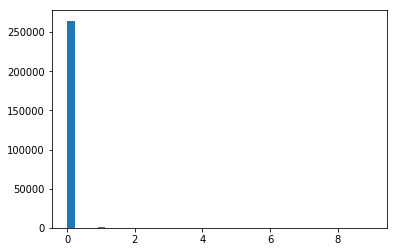

AMT_REQ_CREDIT_BUREAU_WEEK


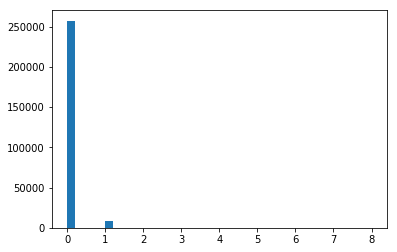

AMT_REQ_CREDIT_BUREAU_MON


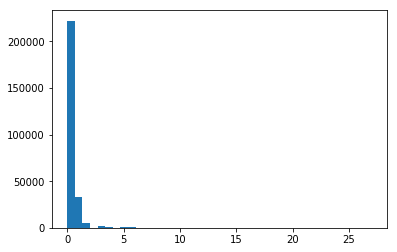

AMT_REQ_CREDIT_BUREAU_QRT


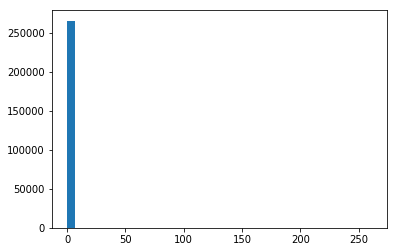

AMT_REQ_CREDIT_BUREAU_YEAR


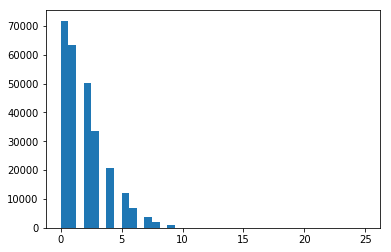

There are 109 numerical columns.


In [6]:
selected_dtypes = 'float64int64int32'
numeric_col = 0

for col in app_train.columns:
    if re.search('%s' %app_train[col].dtype, selected_dtypes):
        print(col)
        plt.hist(app_train[col], bins = 40)
        plt.show()
        numeric_col += 1

print('There are %s numerical columns.' %numeric_col)

In [7]:
print(app_train['OWN_CAR_AGE'].describe())
app_train['OWN_CAR_AGE'].value_counts().sort_index(ascending = False)

count    104582.000000
mean         12.061091
std          11.944812
min           0.000000
25%           5.000000
50%           9.000000
75%          15.000000
max          91.000000
Name: OWN_CAR_AGE, dtype: float64


91.0       2
69.0       1
65.0     891
64.0    2443
63.0       2
57.0       1
56.0       1
55.0       4
54.0      12
52.0       1
51.0       3
50.0       1
49.0       6
48.0       1
47.0       1
46.0       5
45.0      11
44.0      21
43.0      19
42.0      42
41.0      58
40.0      85
39.0      78
38.0      97
37.0      75
36.0     124
35.0     157
34.0     183
33.0     132
32.0     208
        ... 
29.0     397
28.0     542
27.0     483
26.0     580
25.0     865
24.0    1150
23.0    1067
22.0    1250
21.0    1462
20.0    1527
19.0    1864
18.0    2418
17.0    2899
16.0    3355
15.0    3580
14.0    4594
13.0    4566
12.0    4257
11.0    4161
10.0    4806
9.0     5020
8.0     5887
7.0     7424
6.0     6382
5.0     3595
4.0     5557
3.0     6370
2.0     5852
1.0     5280
0.0     2134
Name: OWN_CAR_AGE, Length: 62, dtype: int64

In [8]:
app_train['OWN_CAR_AGE_ANOM'] = app_train[app_train['OWN_CAR_AGE'].isin([64, 65])]['OWN_CAR_AGE']
app_train['OWN_CAR_AGE_ANOM'].value_counts()

64.0    2443
65.0     891
Name: OWN_CAR_AGE_ANOM, dtype: int64

In [9]:
app_train['OWN_CAR_AGE'].replace({64: np.nan, 65: np.nan}, inplace = True)
app_train['OWN_CAR_AGE'].value_counts().sort_index(ascending = False)

91.0       2
69.0       1
63.0       2
57.0       1
56.0       1
55.0       4
54.0      12
52.0       1
51.0       3
50.0       1
49.0       6
48.0       1
47.0       1
46.0       5
45.0      11
44.0      21
43.0      19
42.0      42
41.0      58
40.0      85
39.0      78
38.0      97
37.0      75
36.0     124
35.0     157
34.0     183
33.0     132
32.0     208
31.0     267
30.0     326
29.0     397
28.0     542
27.0     483
26.0     580
25.0     865
24.0    1150
23.0    1067
22.0    1250
21.0    1462
20.0    1527
19.0    1864
18.0    2418
17.0    2899
16.0    3355
15.0    3580
14.0    4594
13.0    4566
12.0    4257
11.0    4161
10.0    4806
9.0     5020
8.0     5887
7.0     7424
6.0     6382
5.0     3595
4.0     5557
3.0     6370
2.0     5852
1.0     5280
0.0     2134
Name: OWN_CAR_AGE, dtype: int64

Text(0.5, 1.0, 'TARGET = 0')

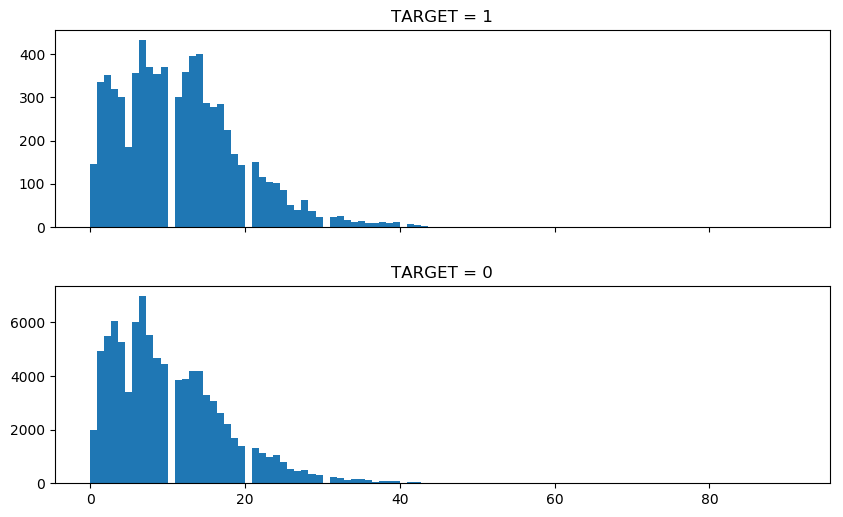

In [11]:
fig = plt.figure(figsize=(10,6), dpi = 100)
gs = gridspec.GridSpec(nrows = 2, ncols = 1, figure = fig, hspace = 0.3)
ax1 = fig.add_subplot(gs[0,0])
ax2 = fig.add_subplot(gs[1,0], sharex = ax1)
plt.setp(ax1.get_xticklabels(), visible=False)

ax1.hist(app_train.loc[app_train['TARGET'] == 1, 'OWN_CAR_AGE'], 100)
ax1.set_title('TARGET = 1')
ax2.hist(app_train.loc[app_train['TARGET'] == 0, 'OWN_CAR_AGE'], 100)
ax2.set_title('TARGET = 0')